In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

data preprocesing

In [2]:

#* normalizace(z rozsah(0,255) na rozsah(0,1))
x_train, x_test = x_train / 255.0, x_test / 255.0
#* one hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

neuronova sit

In [3]:

#* neural net s rozmery 28*28, 128, 64, 10 
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

trenink modelu

In [4]:
%%time
model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)
print("trenovano na 60 000 prikladech * 10 epoch = 600 000 prikladu")

Epoch 1/10
1688/1688 [==============================] - 11s 6ms/step - loss: 0.2570 - accuracy: 0.9257 - val_loss: 0.1100 - val_accuracy: 0.9683
Epoch 2/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.1087 - accuracy: 0.9672 - val_loss: 0.0978 - val_accuracy: 0.9728
Epoch 3/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0742 - accuracy: 0.9769 - val_loss: 0.0936 - val_accuracy: 0.9720
Epoch 4/10
1688/1688 [==============================] - 15s 9ms/step - loss: 0.0570 - accuracy: 0.9822 - val_loss: 0.0763 - val_accuracy: 0.9780
Epoch 5/10
1688/1688 [==============================] - 14s 8ms/step - loss: 0.0445 - accuracy: 0.9852 - val_loss: 0.0816 - val_accuracy: 0.9790
Epoch 6/10
1688/1688 [==============================] - 22s 13ms/step - loss: 0.0357 - accuracy: 0.9883 - val_loss: 0.0960 - val_accuracy: 0.9747
Epoch 7/10
1688/1688 [==============================] - 21s 13ms/step - loss: 0.0303 - accuracy: 0.9901 - val_loss: 0.0957 - val_

evaluace modelu

In [5]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 2s 7ms/step - loss: 0.0889 - accuracy: 0.9789
Test accuracy: 0.9789000153541565


predikce na celim test setu

In [6]:
predictions = model.predict(x_test)

313/313 [==============================] - 2s 6ms/step


predikce na nahodnym obrazku z test setu

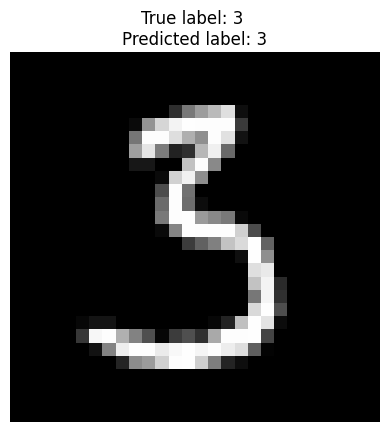

In [7]:

#* ukazat nahodny obrazek z test setu a jeho brealnou a predpovedenou hodnotu
index = np.random.randint(0, len(x_test))
plt.imshow(x_test[index], cmap='gray')
plt.title(f"True label: {np.argmax(y_test[index])} \nPredicted label: {np.argmax(predictions[index])}")
plt.axis('off')
plt.show()

ukazovat jenom spatne priklady

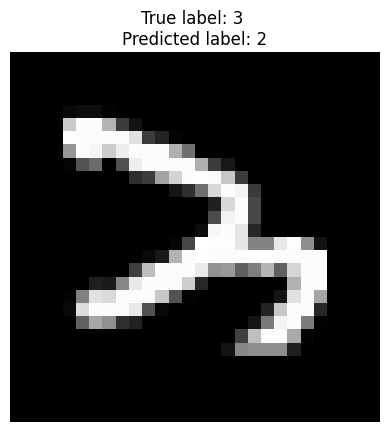

In [8]:

#*pokud se relita nerovna predikci tak to ukazat a skoncit ten for cyklus
for prediction in predictions:
    index = np.random.randint(0, len(x_test))
    if np.argmax(y_test[index]) != np.argmax(predictions[index]):
        # Plot a random test image and its predicted label
        plt.imshow(x_test[index], cmap='gray')
        plt.title(f"True label: {np.argmax(y_test[index])} \nPredicted label: {np.argmax(predictions[index])}")
        plt.axis('off')
        plt.show()
        break